In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
N = 3000
t = np.arange(0, N)

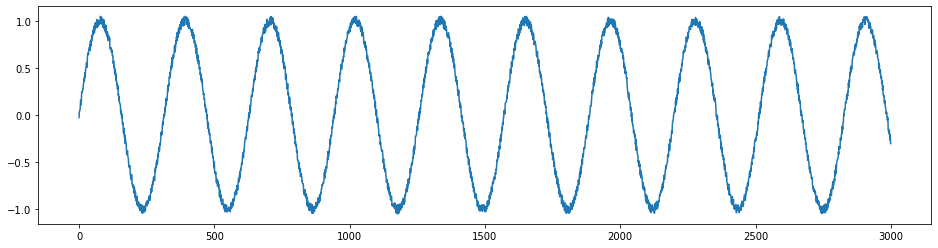

In [ ]:
data_sin = np.sin(0.02*t) + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 4))
plt.plot(data_sin)
plt.show()

In [ ]:
def convertToDataset(signal, step):
  X = []
  Y = []
  for i in range(len(signal)-2*step):
    j = i + step
    X.append(signal[i:j])
    Y.append(signal[j:j+step])
  return np.array(X), np.array(Y)

In [ ]:
X, Y = convertToDataset(data_sin, 40)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
print(X_train.shape)
print(X_test.shape)

(2336, 40, 1)
(584, 40, 1)


In [ ]:
model = tf.keras.models.Sequential([
   layers.SimpleRNN(units=64, input_shape=(None, 1)),
   layers.Dense(40, activation='linear')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.MSE)

In [ ]:
model.fit(X_train, Y_train, epochs=30, batch_size=16)

Epoch 1/30
146/146 [==============================] - 6s 31ms/step - loss: 0.0957
Epoch 2/30
146/146 [==============================] - 5s 31ms/step - loss: 0.0099
Epoch 3/30
146/146 [==============================] - 4s 30ms/step - loss: 0.0029
Epoch 4/30
146/146 [==============================] - 4s 30ms/step - loss: 0.0022
Epoch 5/30
146/146 [==============================] - 4s 29ms/step - loss: 0.0021
Epoch 6/30
146/146 [==============================] - 4s 29ms/step - loss: 0.0018
Epoch 7/30
146/146 [==============================] - 4s 30ms/step - loss: 0.0020
Epoch 8/30
146/146 [==============================] - 4s 30ms/step - loss: 0.0019
Epoch 9/30
146/146 [==============================] - 5s 36ms/step - loss: 0.0019
Epoch 10/30
146/146 [==============================] - 4s 30ms/step - loss: 0.0018
Epoch 11/30
146/146 [==============================] - 5s 33ms/step - loss: 0.0015
Epoch 12/30
146/146 [==============================] - 5s 37ms/step - loss: 0.0018
Epoch 13/30
1

In [ ]:
model.evaluate(X_test, Y_test)

19/19 [==============================] - 0s 8ms/step - loss: 0.0023


0.002275886246934533

In [ ]:
print(x.shape)

(1, 40, 1)


In [ ]:
N = 80
t = np.arange(0, N)
data = np.sin(0.02*t) + np.random.uniform(-0.05, 0.05, N)
x = data[:40]
y = data[40:]
x = x.reshape(1, -1, 1)
predicted = model.predict(x)
print('predicted: ', predicted)
print('actual: ', y)

predicted:  [[0.740541   0.76562095 0.71427405 0.76360947 0.78671163 0.81549734
  0.8281976  0.82744557 0.84418017 0.8774691  0.85769165 0.8878481
  0.87691396 0.8904594  0.92084956 0.92040294 0.9153711  0.95601064
  0.96635264 0.9822211  0.9939027  0.9753805  0.98075294 1.0172582
  1.052357   0.96568215 1.0646816  1.0046728  0.99233806 0.9990888
  1.0388924  1.0270262  1.0332048  1.0498108  1.0396317  1.0632758
  1.0608038  1.0759885  1.0989178  1.0766985 ]]
actual:  [0.72367222 0.69418191 0.74809326 0.71133042 0.77887388 0.83147313
 0.75751631 0.77432352 0.78671986 0.78520029 0.84357702 0.88155494
 0.8773724  0.91258927 0.87476214 0.91228125 0.92624041 0.86225888
 0.91172383 0.94479961 0.9036821  0.97462137 0.89707958 0.96521899
 0.94629916 0.92993032 0.96875917 1.01840278 0.97622902 1.01662066
 0.94743503 0.95544171 0.98695756 1.02223325 1.02099637 1.01160412
 0.9873062  0.99166207 1.02499728 1.01827527]


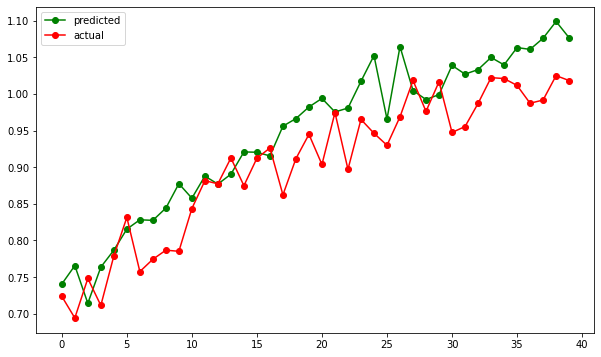

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(predicted[0], color='green', marker='o',label='predicted')
plt.plot(y, color='red', marker='o', label='actual')
# plt.show()
plt.legend()